In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cols = [
    "img_area",
    "vp_area",
    "methodCount",
    "bbCount",
    "instrCount",
    "allocCount",
    "loadCount",
    "loadFieldCount",
    "storeCount",
    "storeFieldCount",
    "branchTakenCount",
    "branchNotTakenCount",
    "time"
]

def import_csv(name):
    return pd.read_csv(name, sep=';', index_col=False, names=cols)

data = import_csv('cnv-greedy-none-20210422-2253.csv')


cnv greedy allinstr


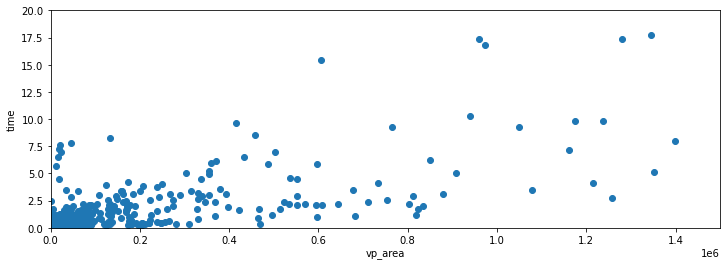

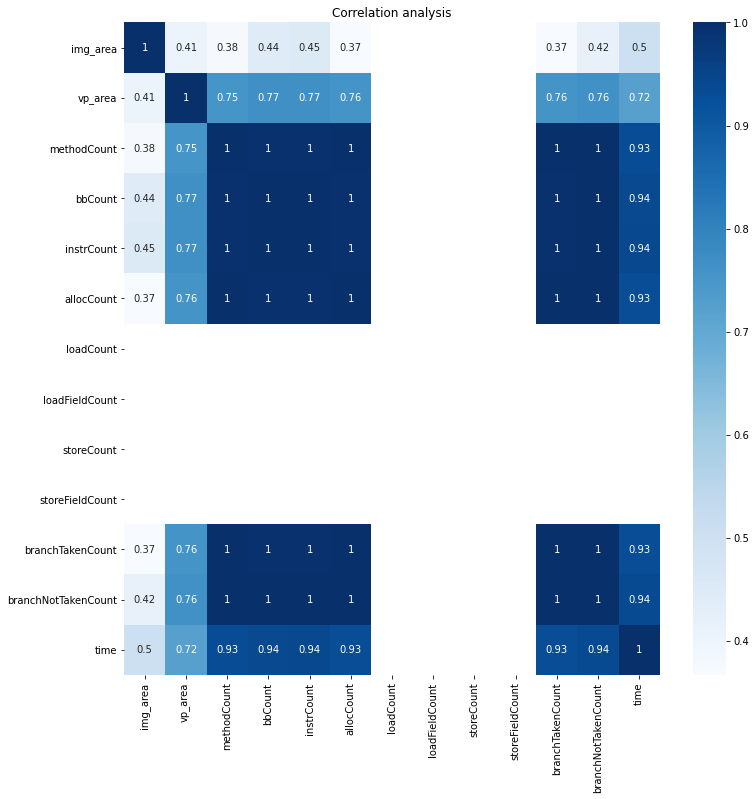

cnv greedy alloc


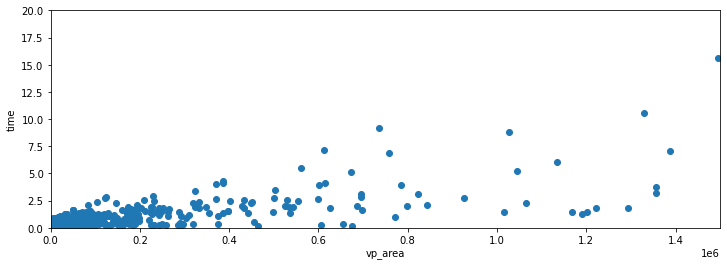

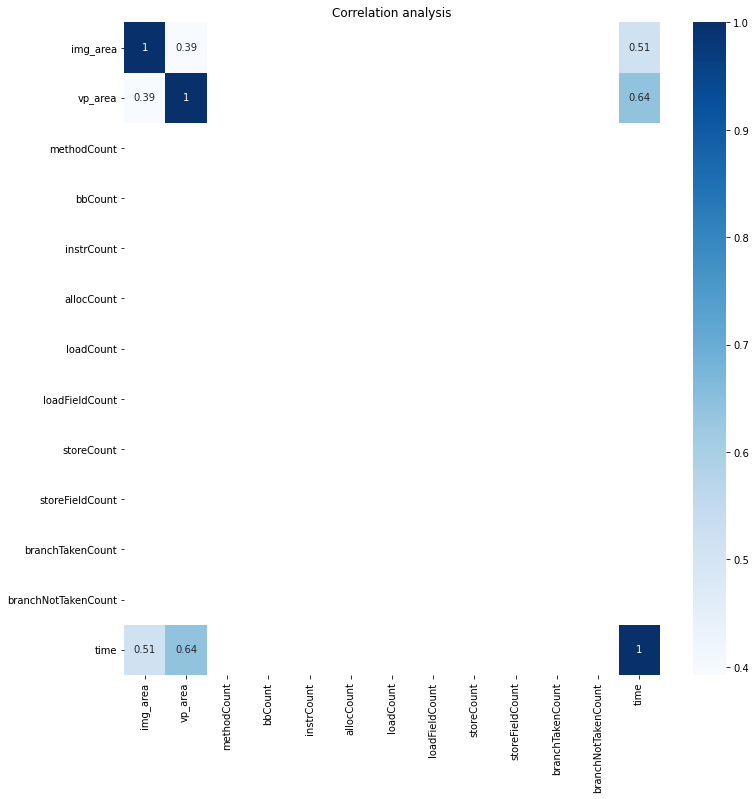

cnv greedy branch


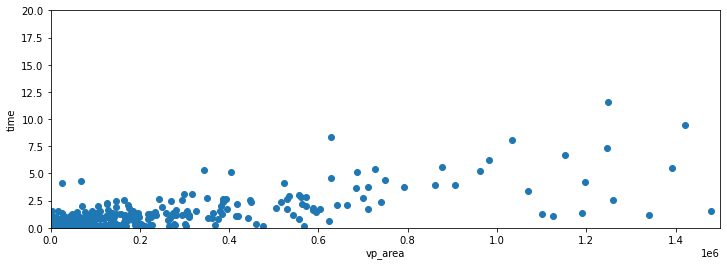

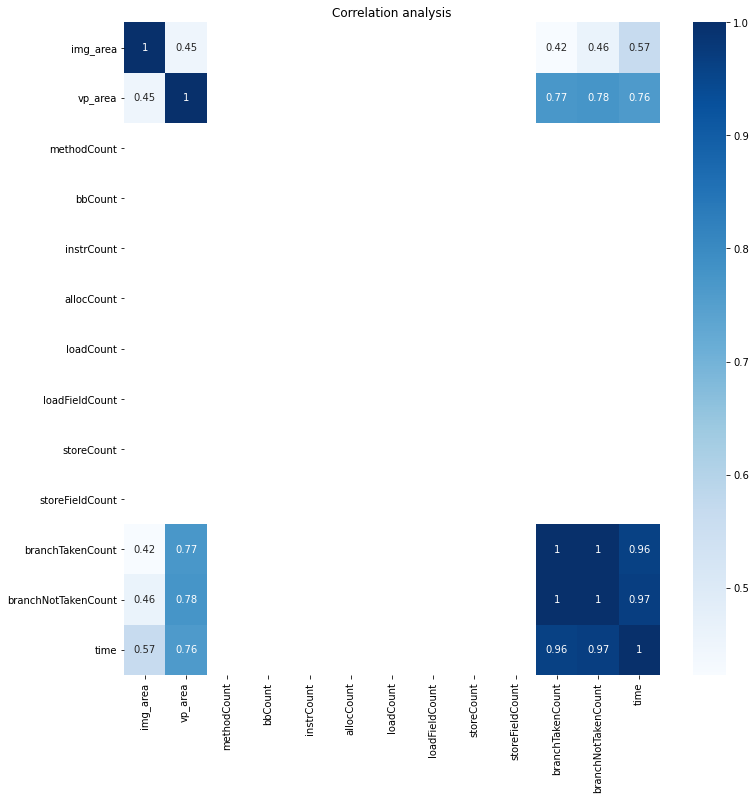

cnv greedy instr+bb+alloc


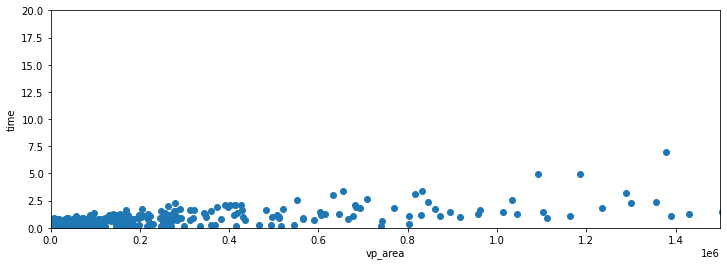

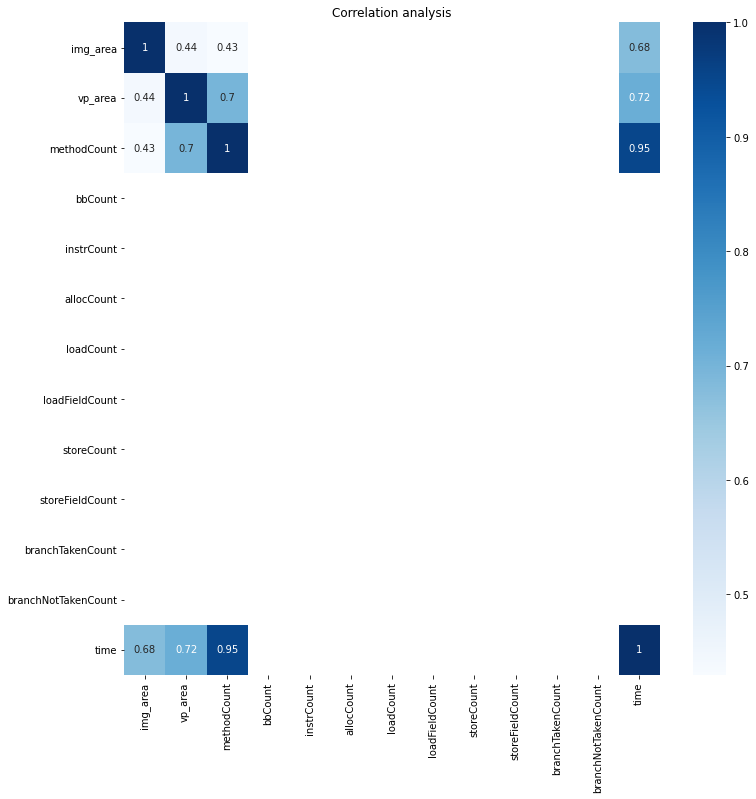

cnv greedy instr+bb+branch


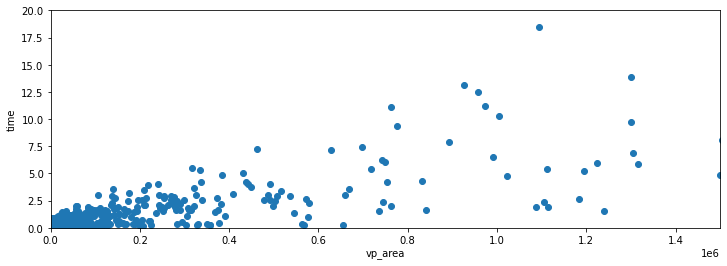

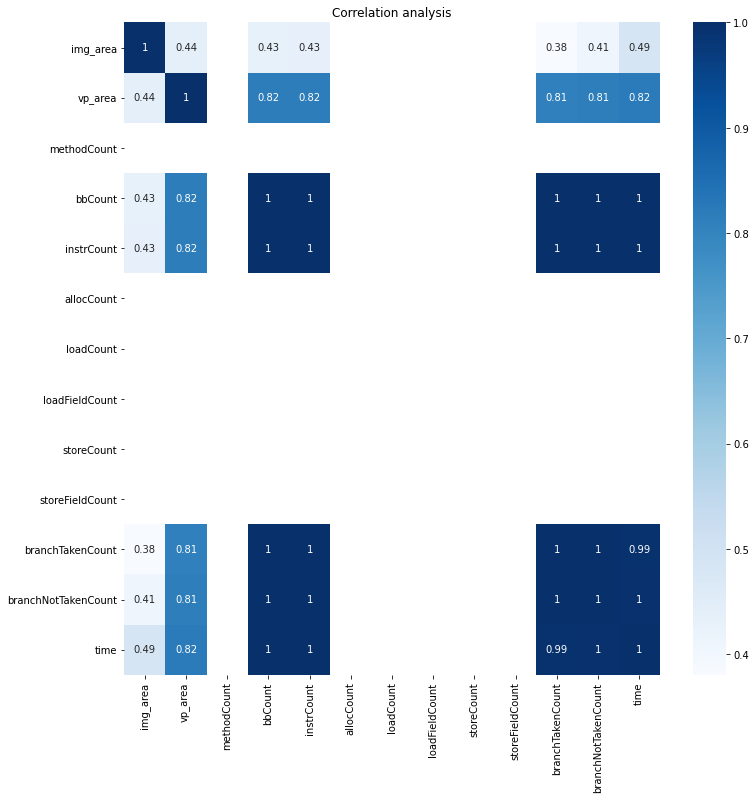

cnv greedy instr+bb+loadstore


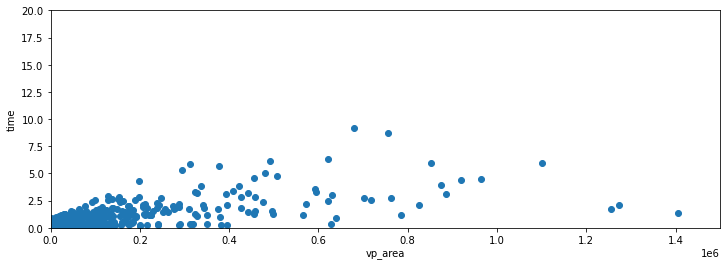

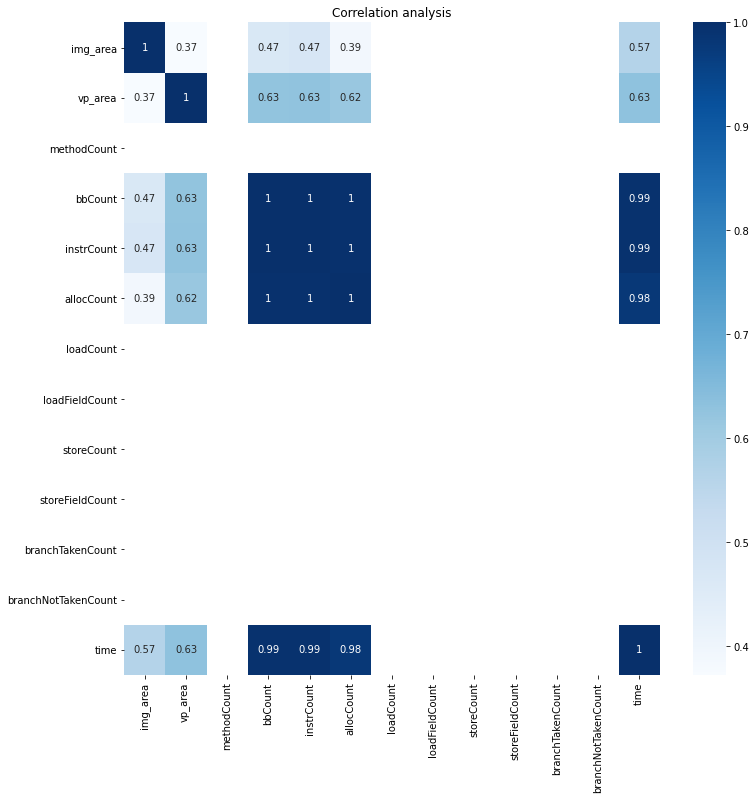

cnv greedy instr+bb+methodcall


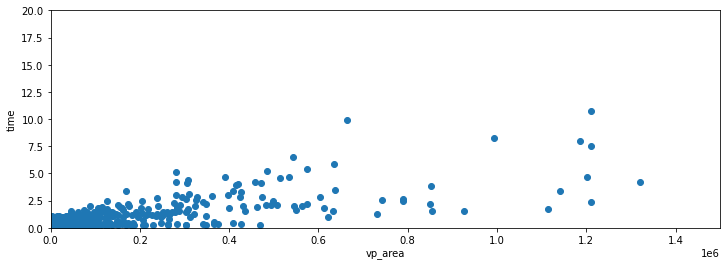

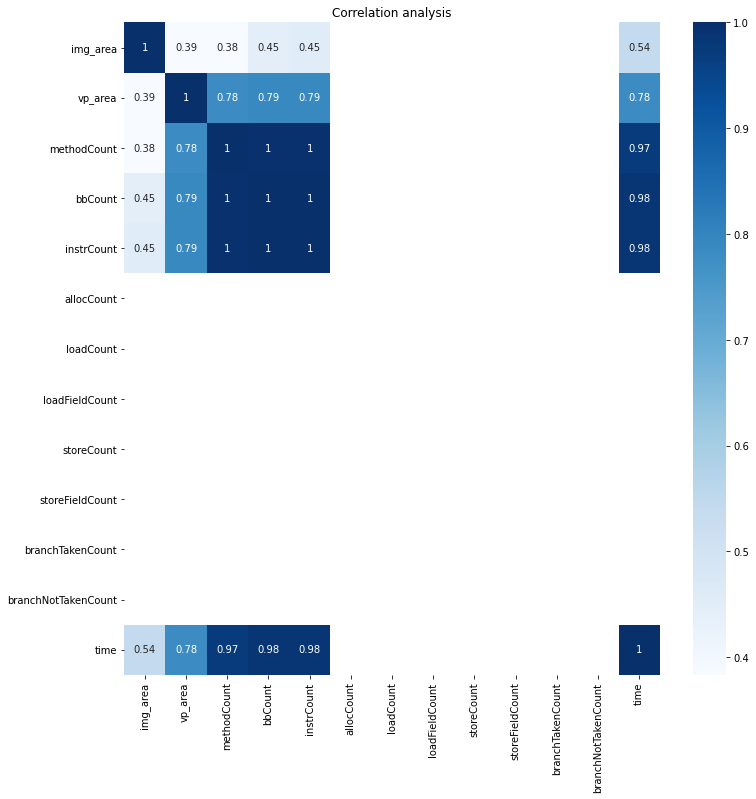

cnv greedy instr+bb


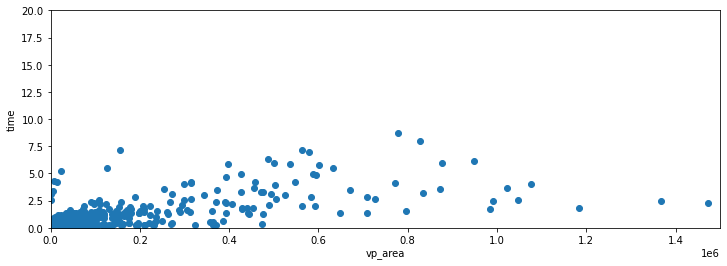

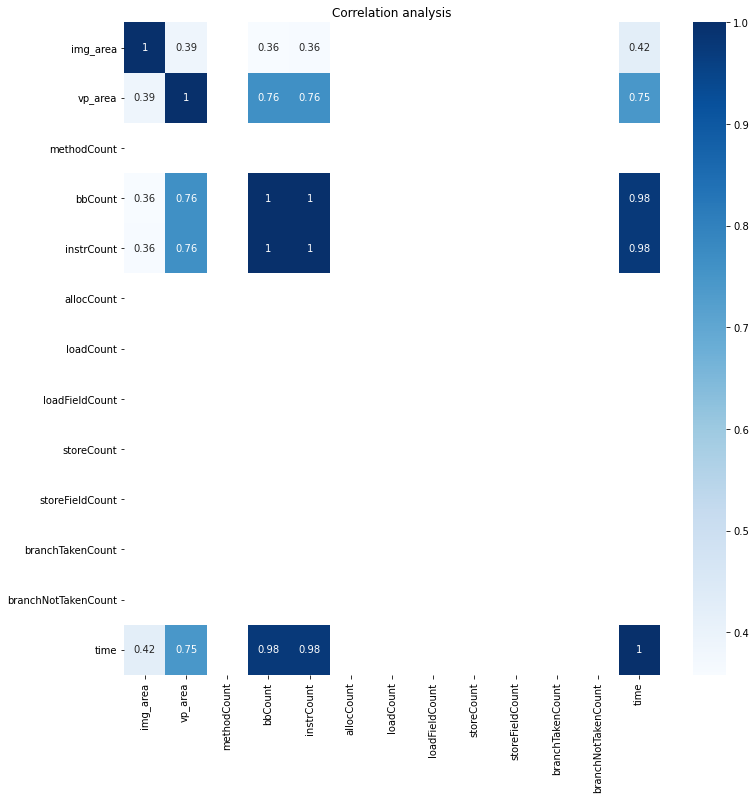

cnv greedy loadstore


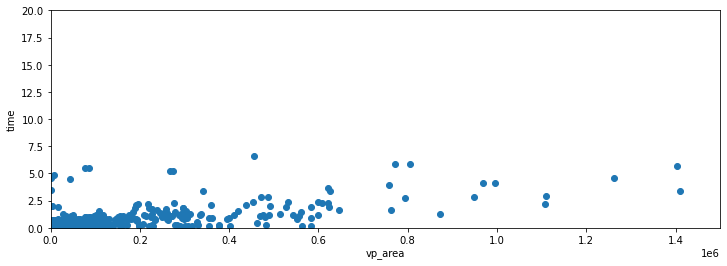

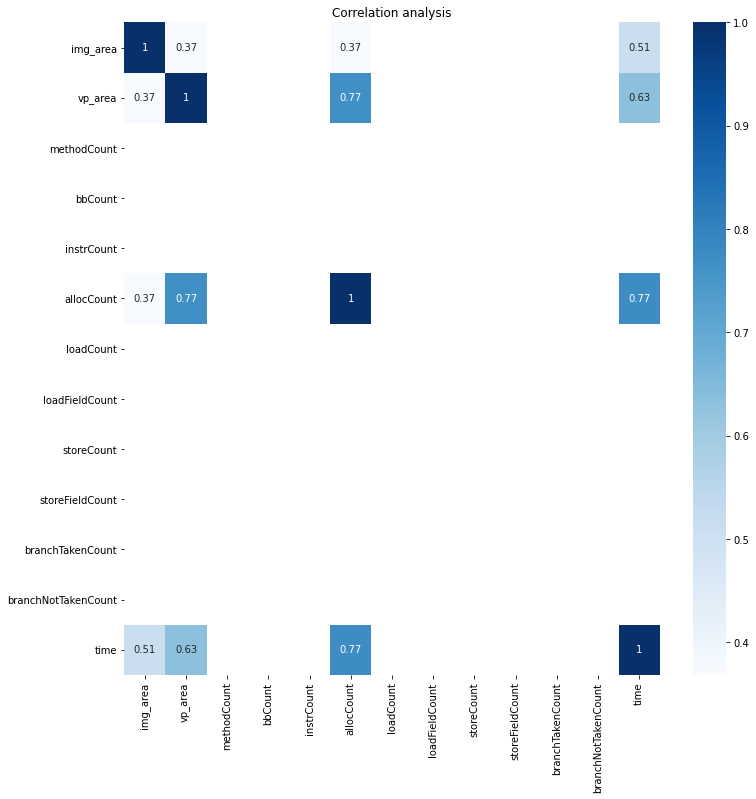

cnv greedy methodcall


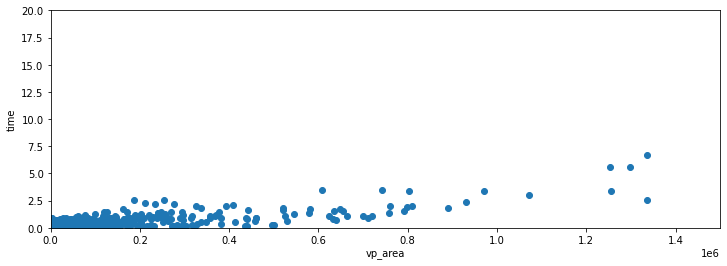

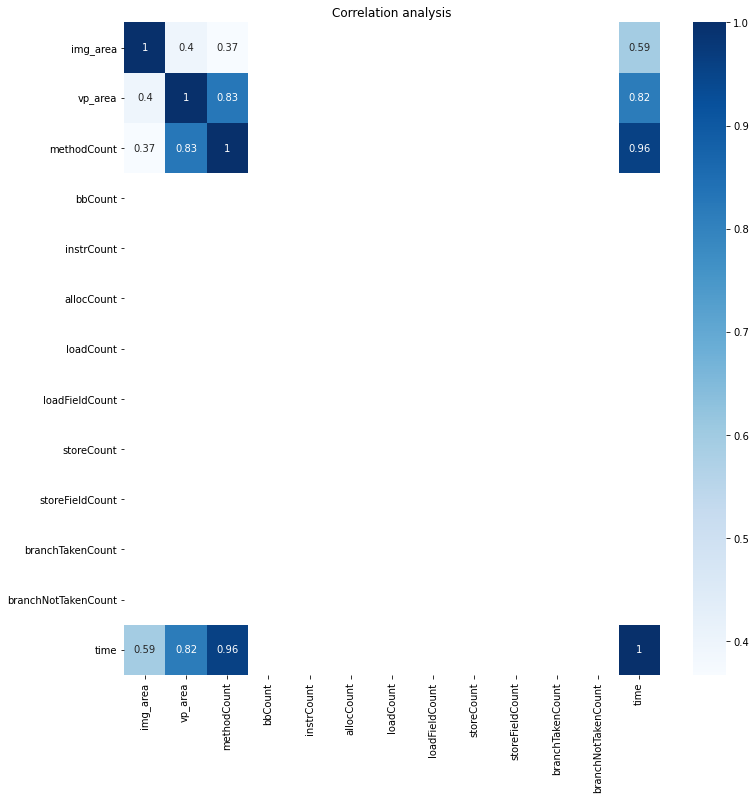

cnv greedy none


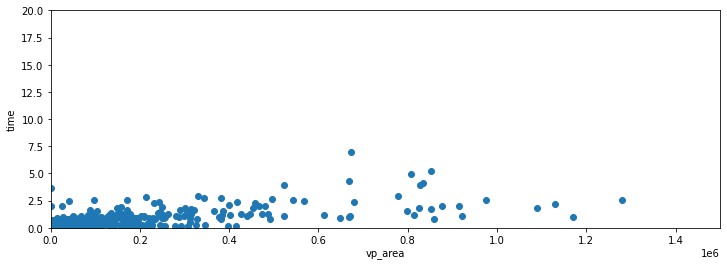

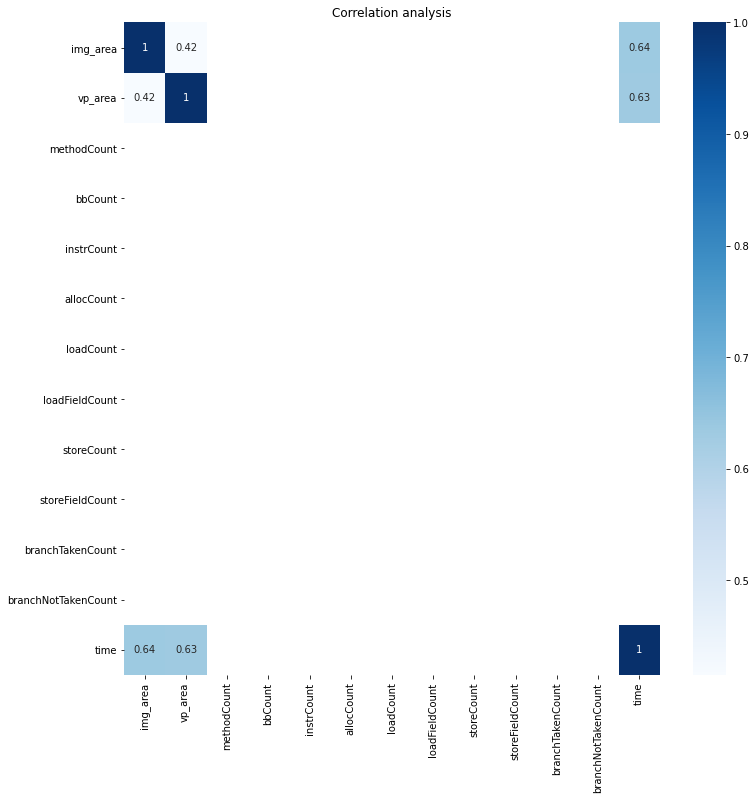

cnv grid allinstr


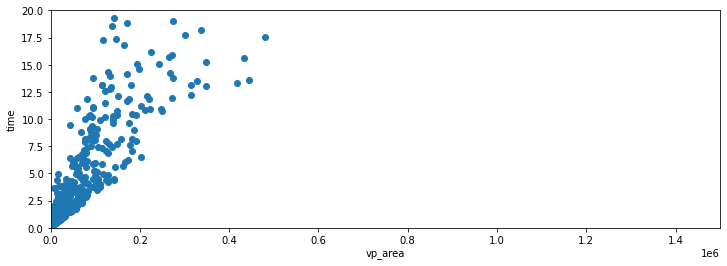

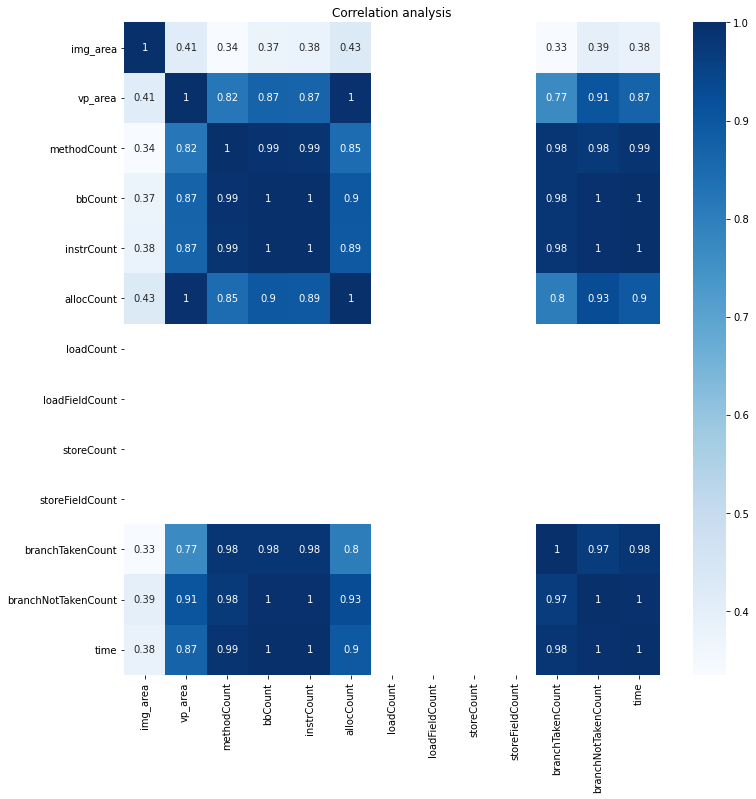

cnv grid alloc


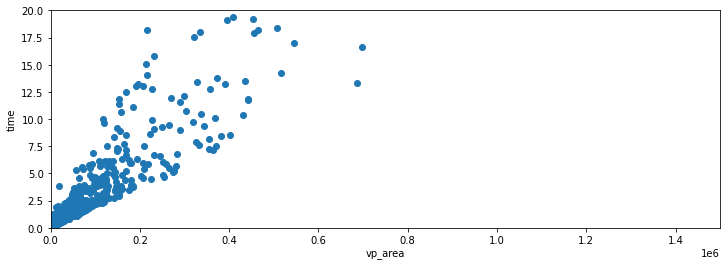

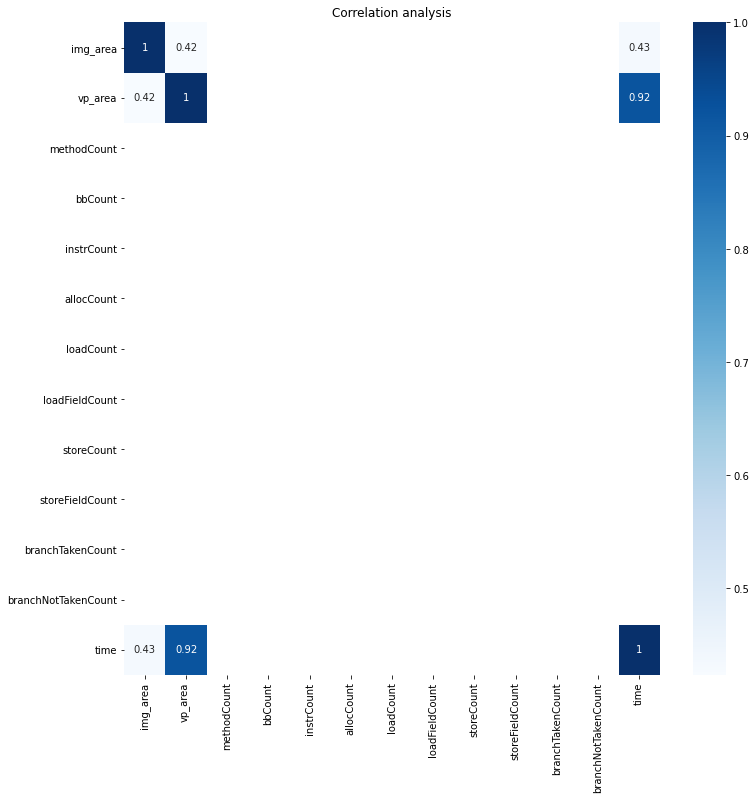

cnv grid branch


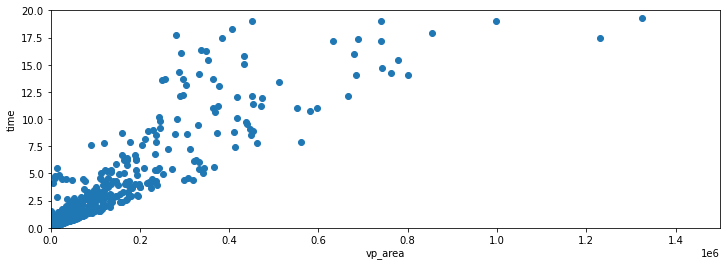

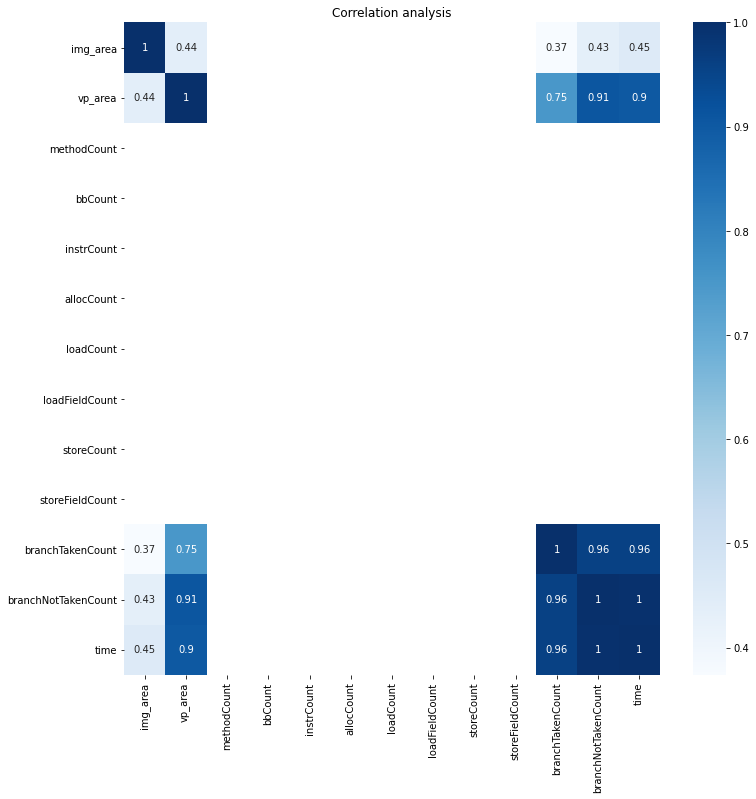

cnv grid instr+bb+alloc


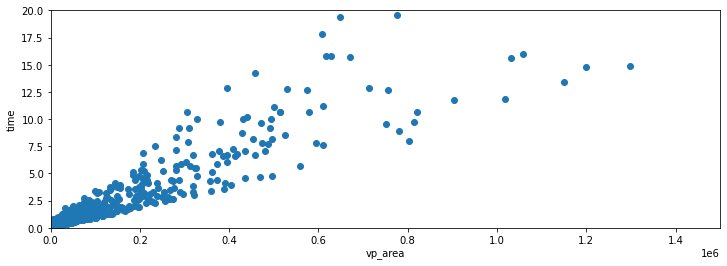

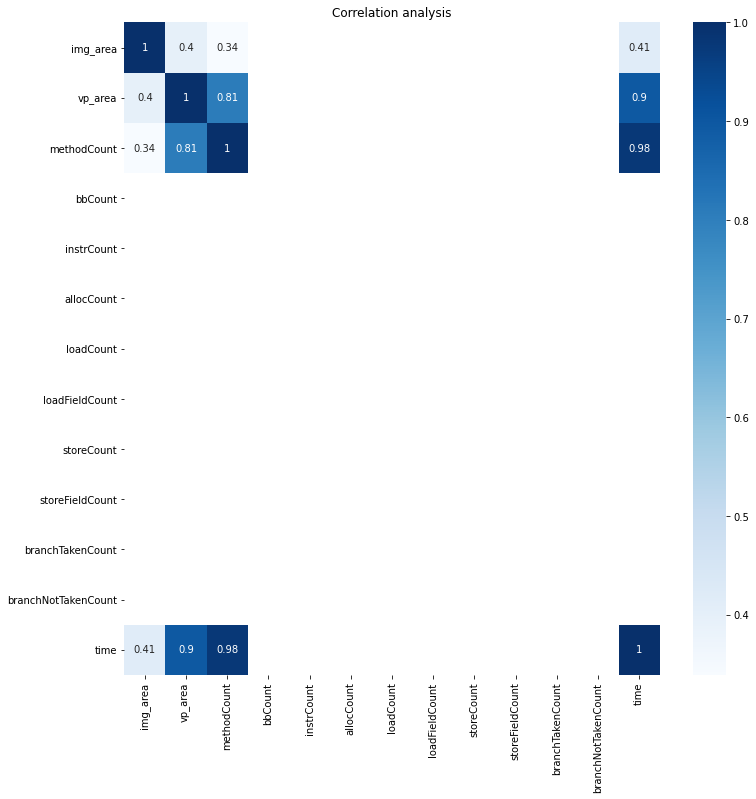

cnv grid instr+bb+loadstore


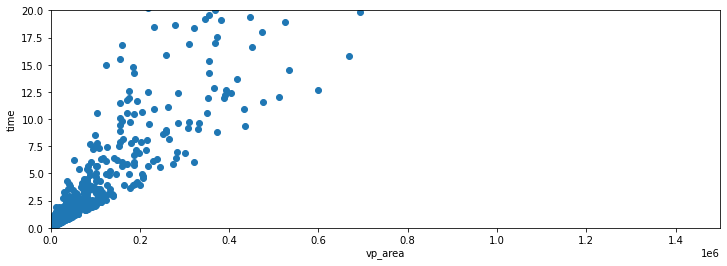

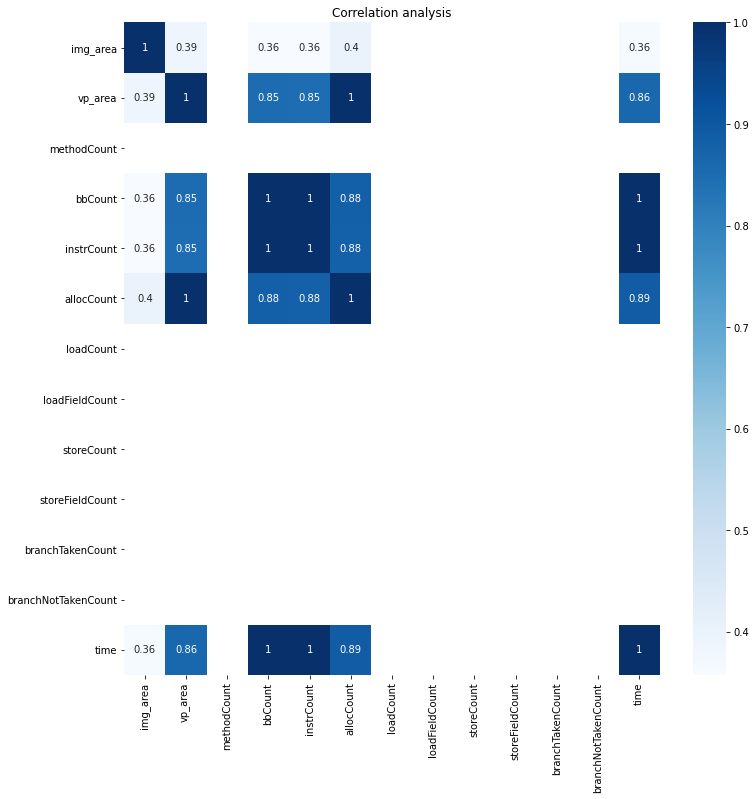

cnv grid instr+bb+methodcall


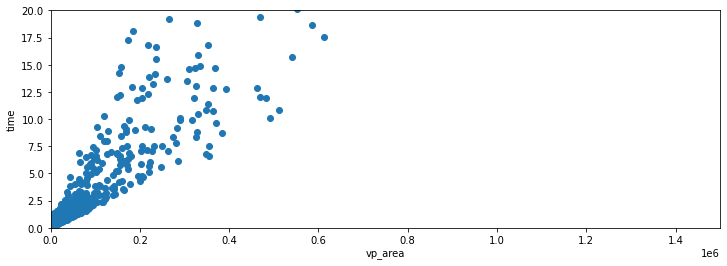

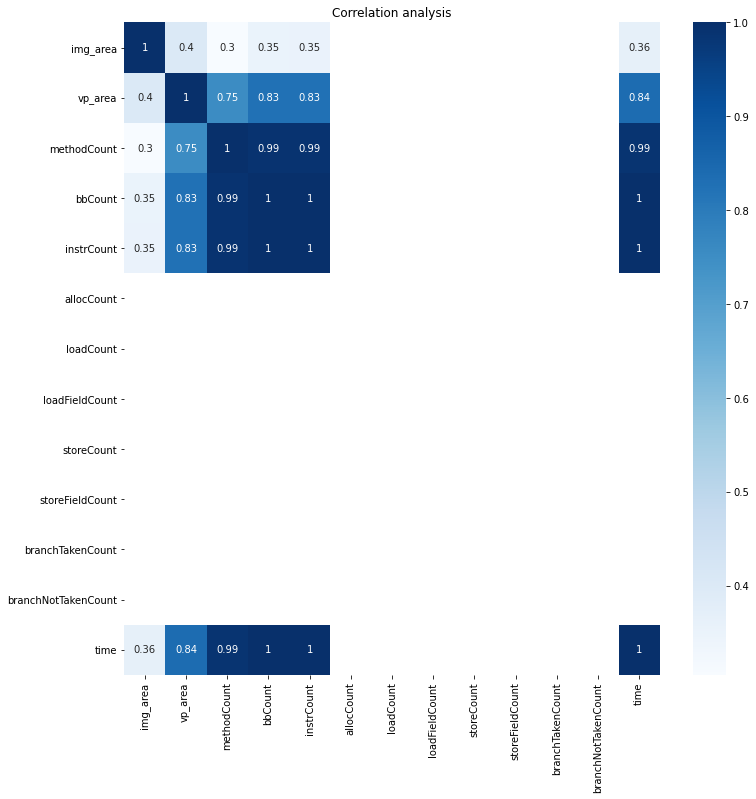

cnv grid instr+bb


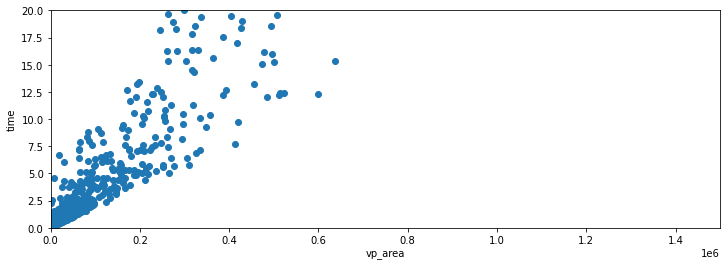

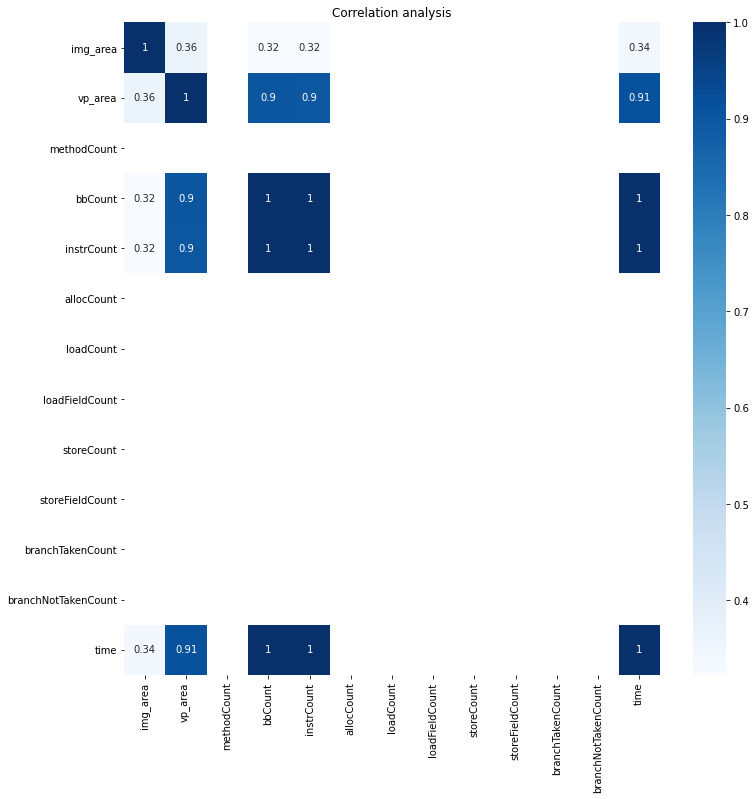

cnv grid loadstore


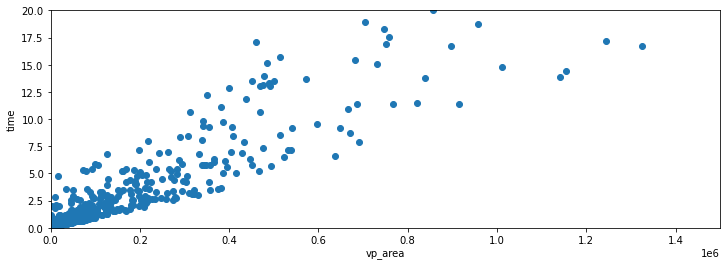

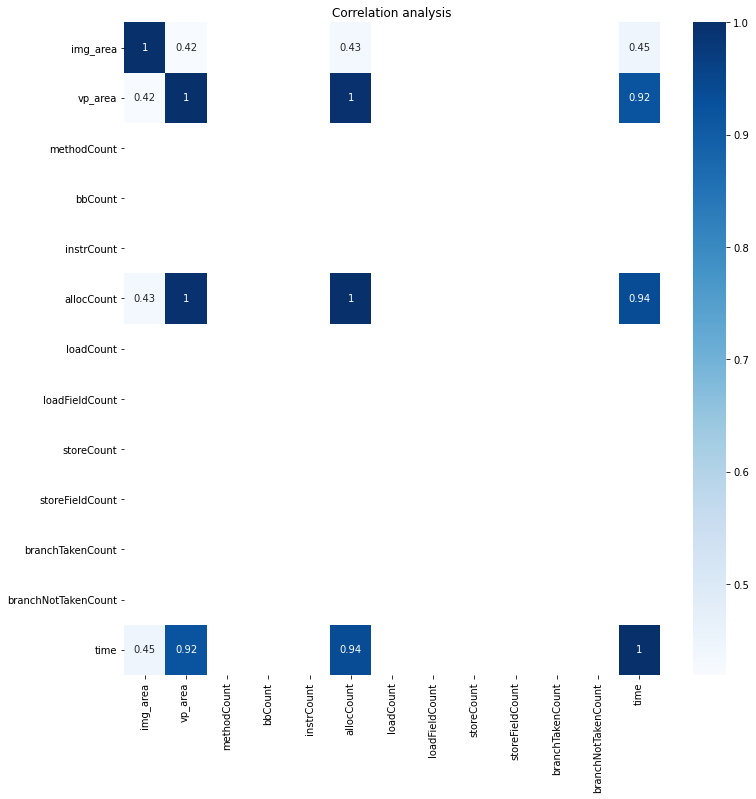

cnv grid methodcall


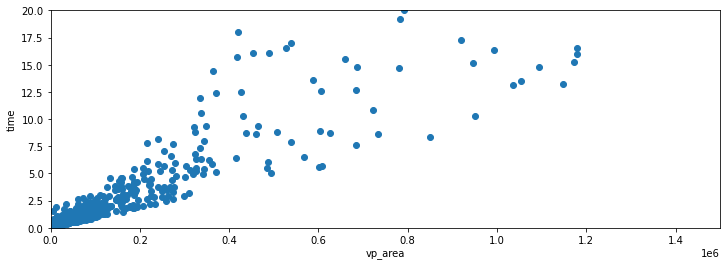

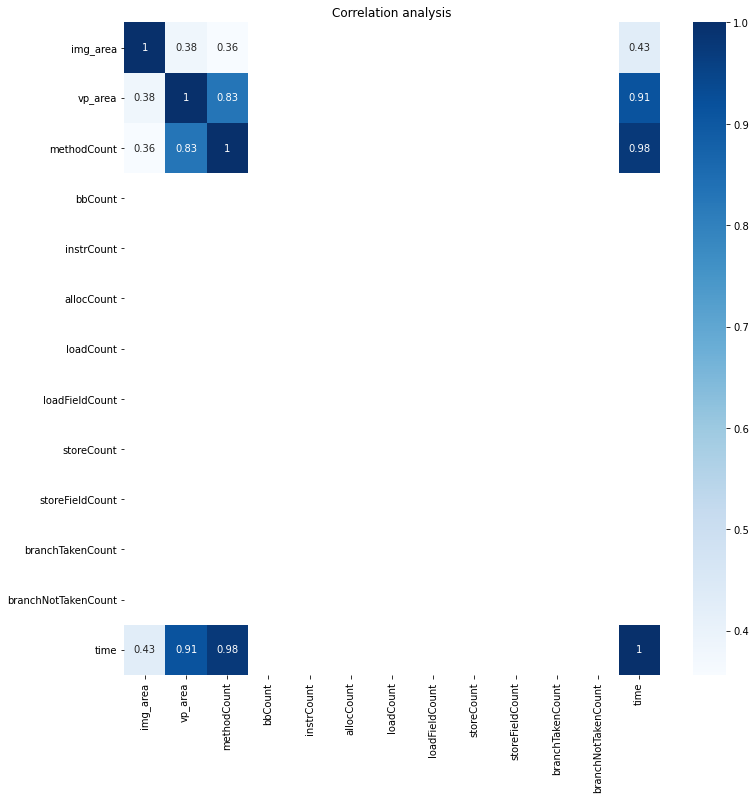

cnv grid none


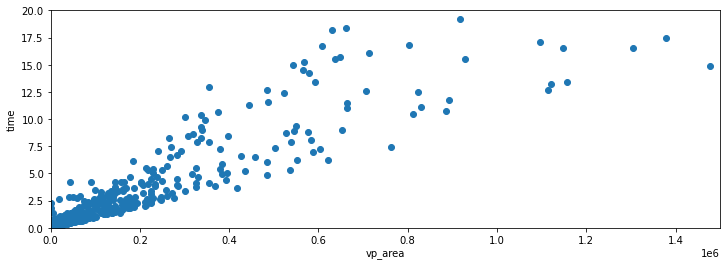

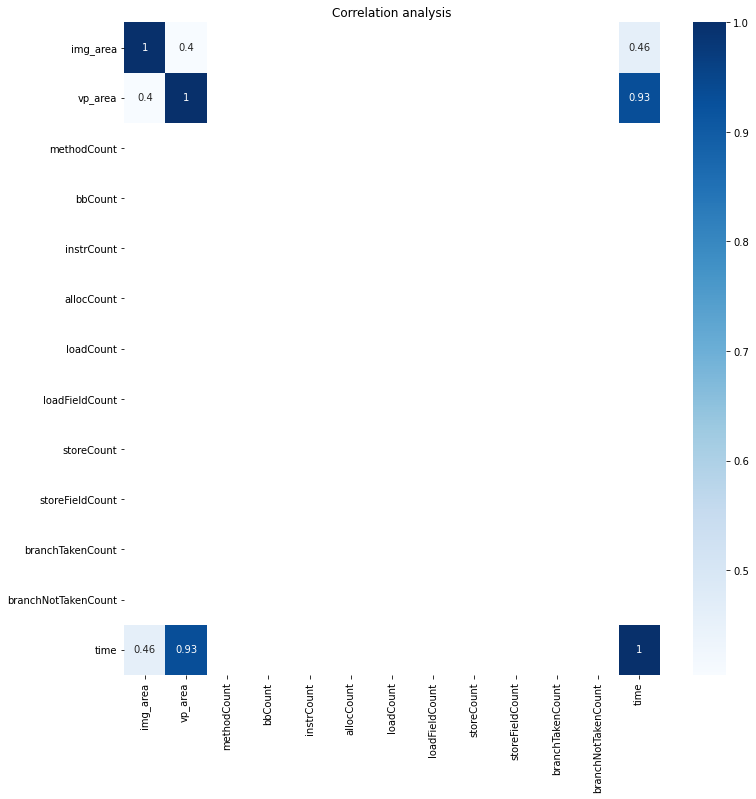

cnv progressive allinstr


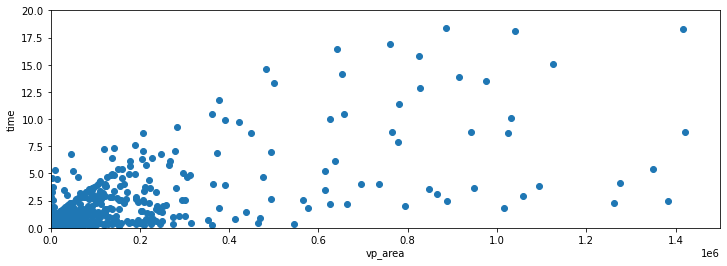

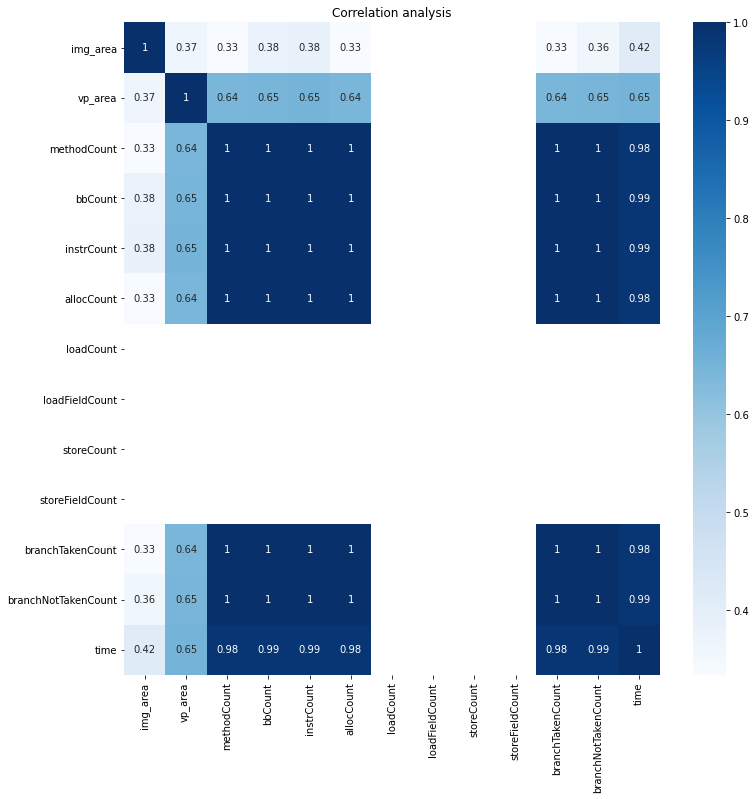

cnv progressive alloc


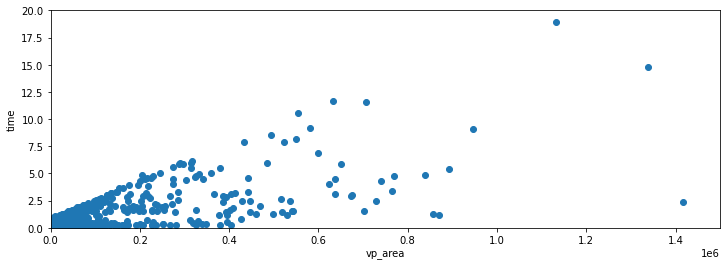

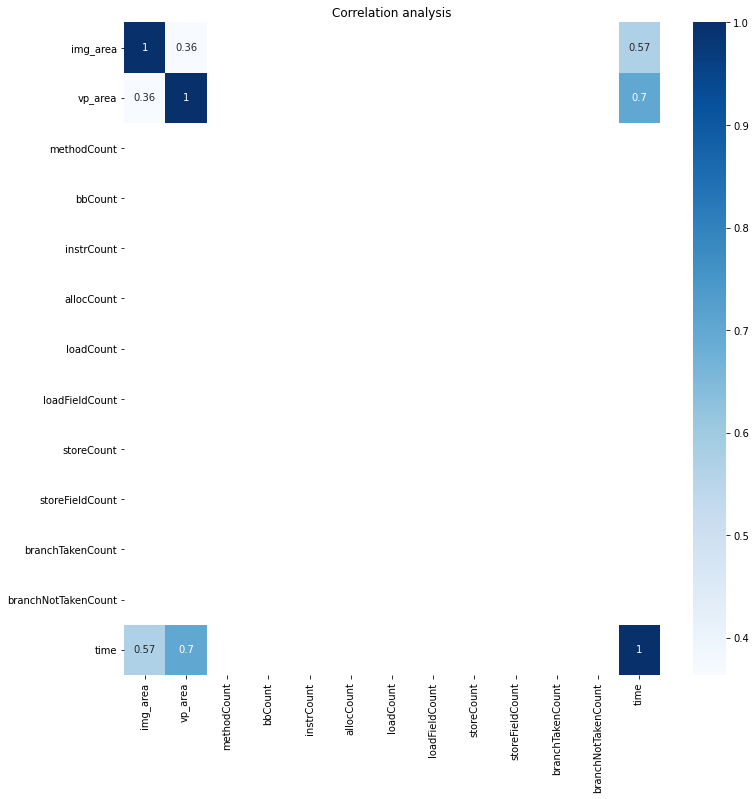

cnv progressive branch


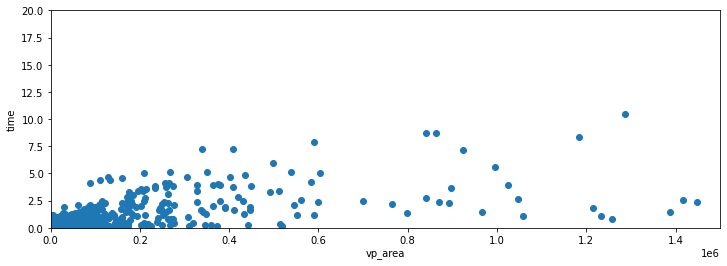

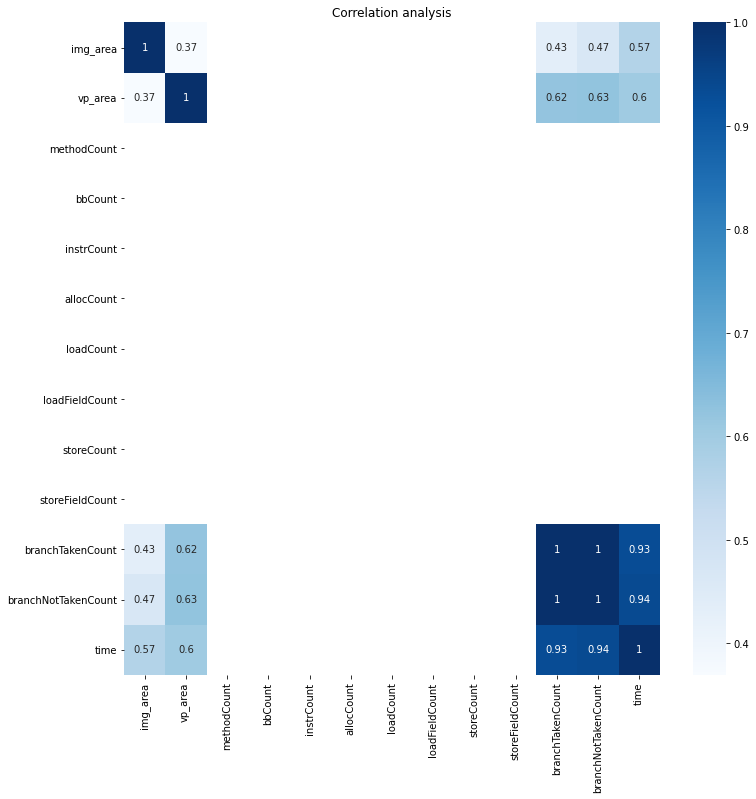

cnv progressive instr+bb+alloc


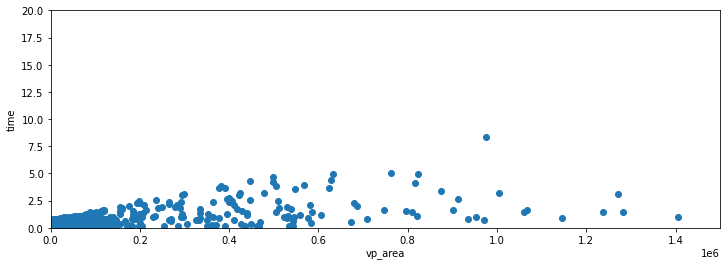

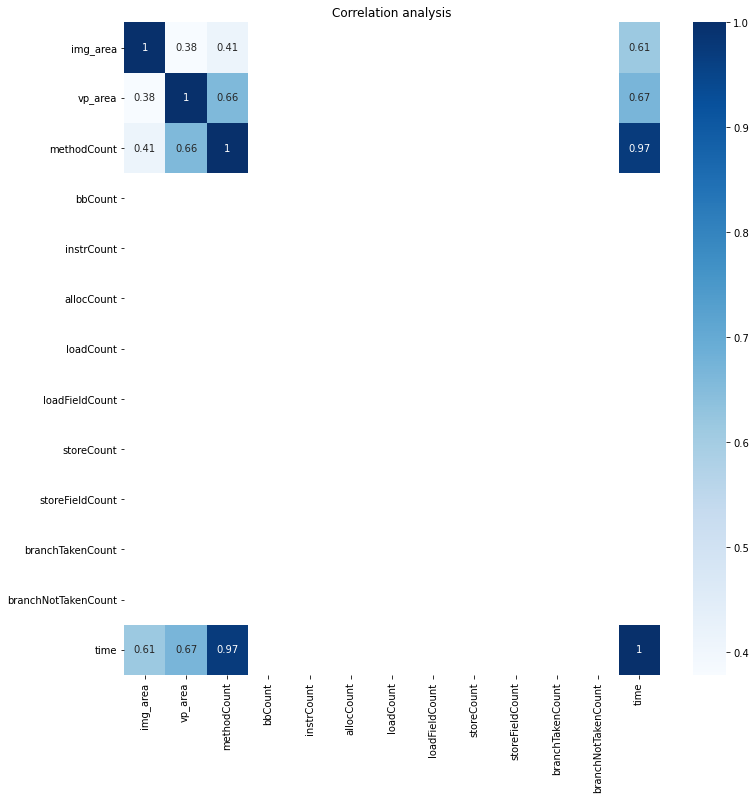

cnv progressive instr+bb+branch


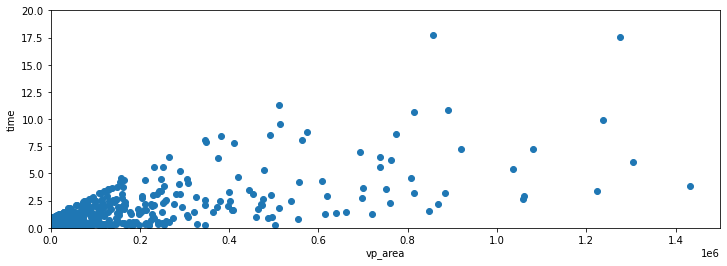

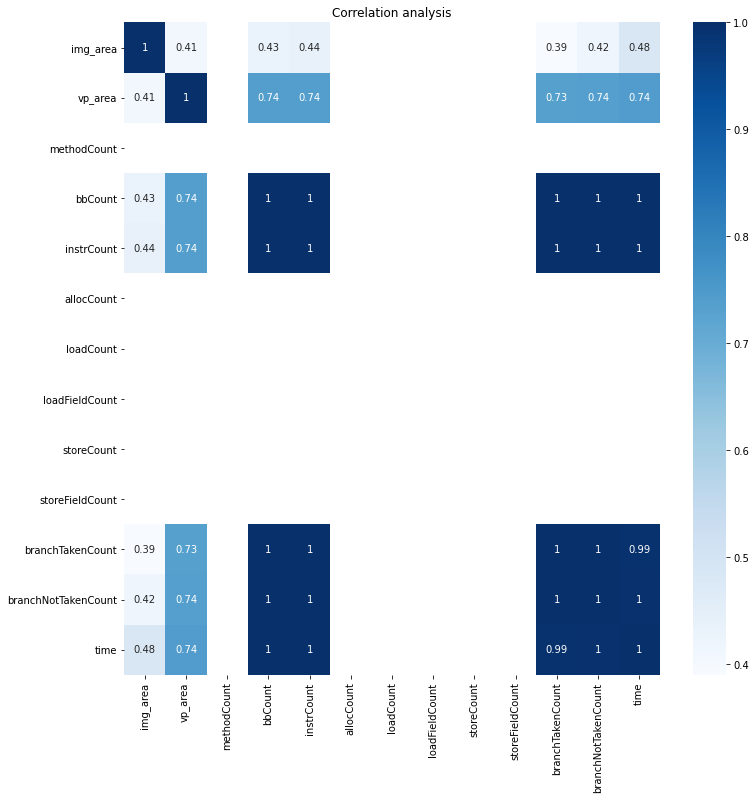

cnv progressive instr+bb+loadstore


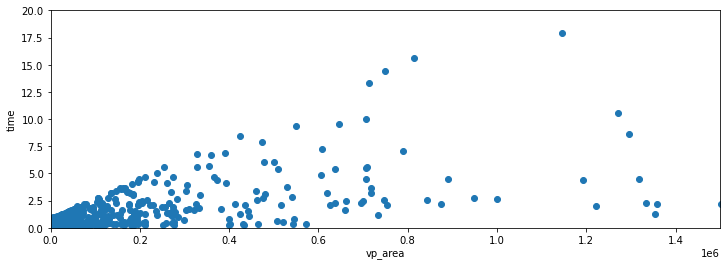

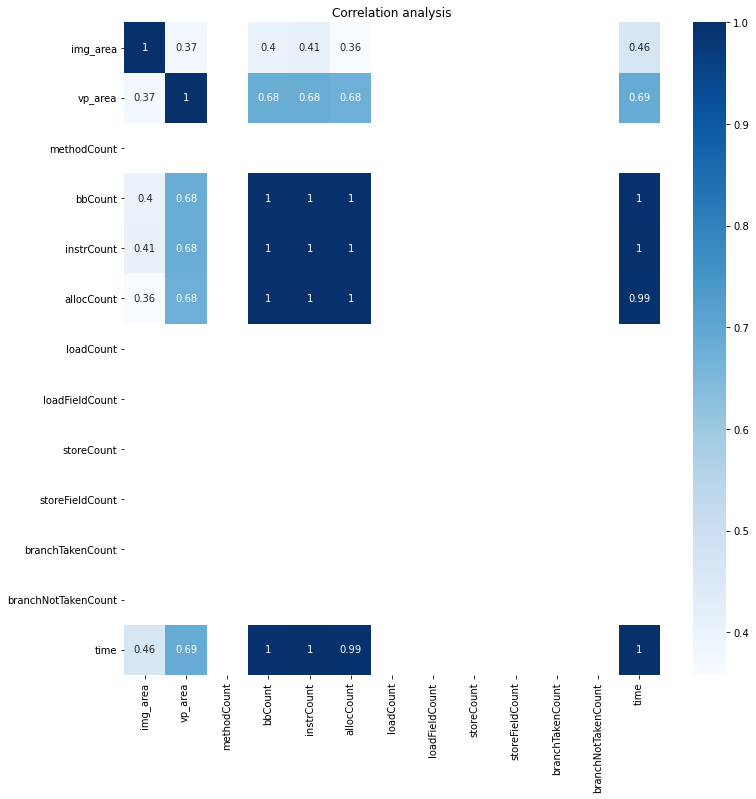

cnv progressive instr+bb+methodcall


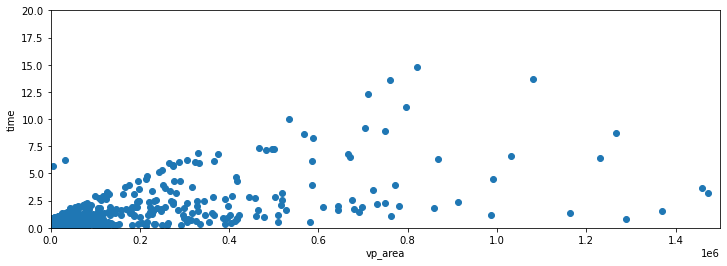

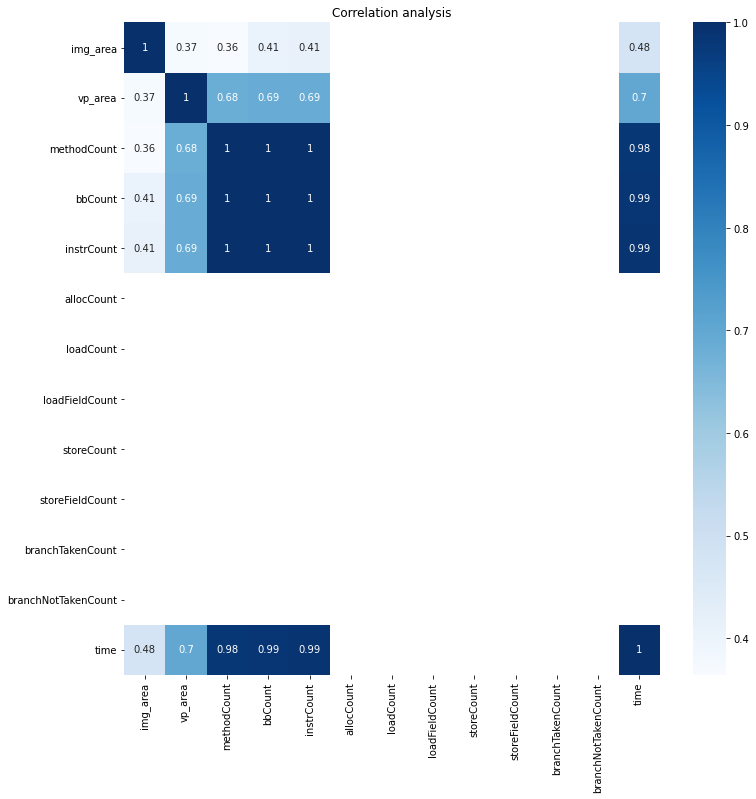

cnv progressive instr+bb


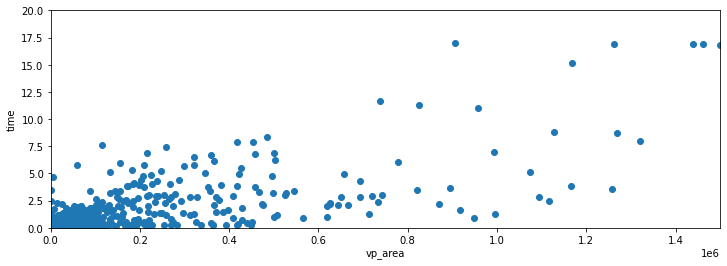

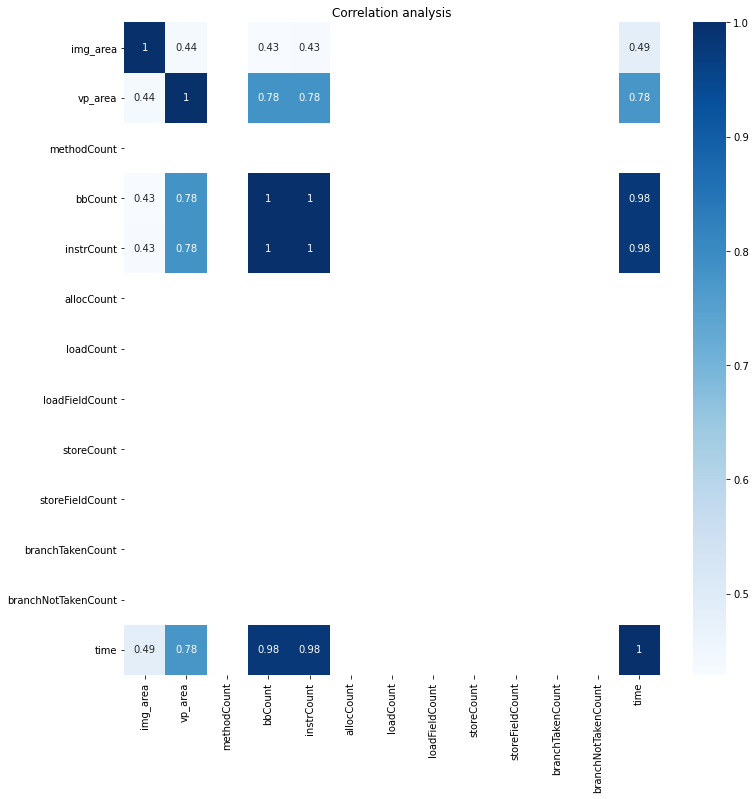

cnv progressive loadstore


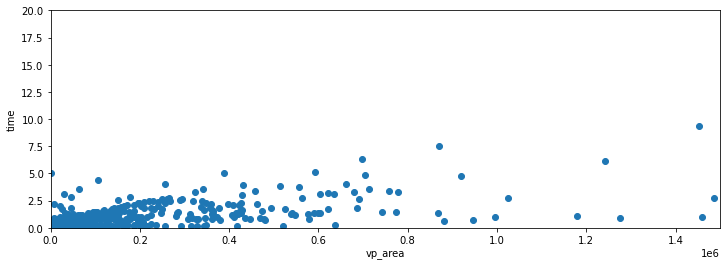

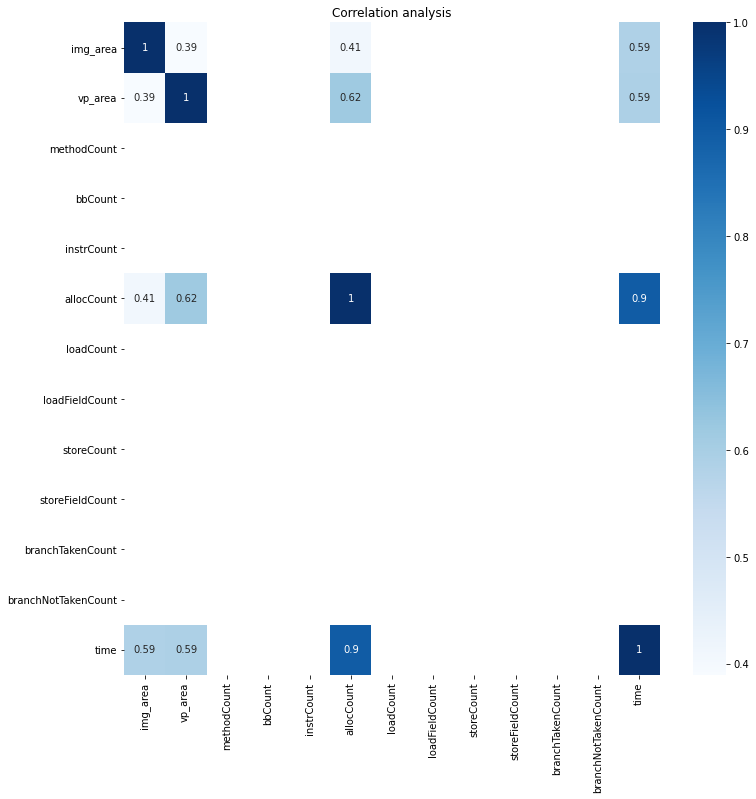

In [ ]:
import os
import seaborn as sns

for file in [f for f in os.listdir() if f[-4:] == '.csv']:
    print(' '.join(file.split('-')[:3]))
    data = import_csv(file)
    # scatterplot
    plt.figure(figsize=(12, 4))
    plt.ylim(0, 20)
    plt.xlabel('vp_area')
    plt.ylabel('time')
    plt.xlim(0, 1.5e6)
    plt.scatter(data['vp_area'], data['time'])
    plt.show()
    
    # correlations
    fig = plt.figure(figsize=[12, 12])
    corr_mtx = data.corr()
    sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
    plt.title('Correlation analysis')
    plt.show()
    


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X = data[['img_area', 'vp_area']].values
y = data['time'].values

trnX, tstX, trnY, tstY = train_test_split(X, y)

regr = DecisionTreeRegressor()
regr.fit(trnX, trnY)
tstPred = regr.predict(tstX)

# Plot the results
plt.figure()
plt.scatter(trnX[:,0], trnY, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(tstX[:,0], tstPred, color="cornflowerblue", label="max_depth=2", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Decision Tree Regression")
# plt.legend()
# plt.show()